In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
scores = pd.read_csv("data/student_scores.csv")

In [3]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
scores.columns = ['hours', 'scores']

In [5]:
scores.columns

Index(['hours', 'scores'], dtype='object')

In [6]:
type(scores)

pandas.core.frame.DataFrame

In [7]:
import seaborn as sns

C:\Users\edwin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


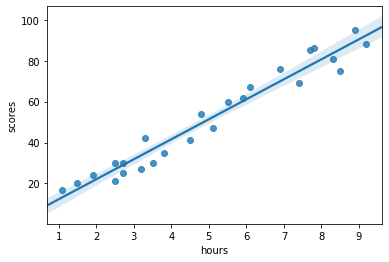

In [8]:
sns.regplot(scores.hours,scores.scores)

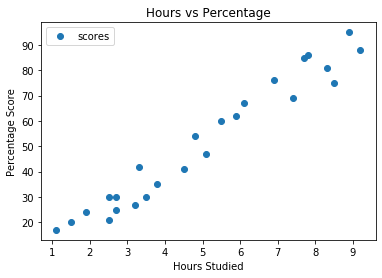

In [9]:
_ = scores.plot(x='hours', y='scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [10]:
scores.corr()

,hours,scores
hours,1.000000,0.976191
scores,0.976191,1.000000


In [11]:
y = scores.iloc[:,1]

In [12]:
x = scores.iloc[:,:-1]

In [13]:
scores

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Preditive modeling

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
a,b,c,d,e = 23,[34,56],54,"yy",True

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regressor = LinearRegression()

In [29]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### y(scores) = mx(hours) + c
y = mx + c

In [30]:
regressor.coef_

array([9.91065648])

In [31]:
regressor.intercept_

2.018160041434683

#### y = 9.9107x + 2.018

In [46]:
y_pred = list(regressor.predict(X_test))

In [53]:
y_final_pred = []

for i in y_pred:
    y_final_pred.append(int(i))
    
y_final_pred

[16, 33, 75, 26, 60]

In [36]:
y_real = list(y_test)

In [37]:
y_real

[20, 27, 69, 30, 62]

In [58]:
data = {"Prediction": y_final_pred, "Real" : y_real}

In [59]:
data_df = pd.DataFrame(data)

In [61]:
data_df.head(10)

,Prediction,Real
0,16,20
1,33,27
2,75,69
3,26,30
4,60,62


In [62]:
scores.scores.describe()

count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: scores, dtype: float64

In [63]:
import matplotlib.pyplot as plt

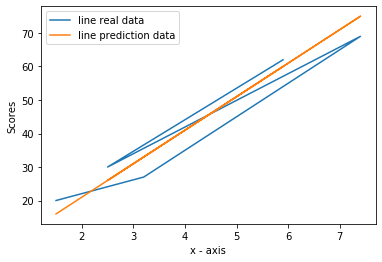

In [70]:
plt.plot(X_test, data_df['Real'],label = "line real data")

plt.plot(X_test, data_df['Prediction'],  label = "line prediction data")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('Scores')
plt.legend()
plt.show()